In [1]:
import os

dir_parent = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
os.chdir(dir_parent)

import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.io as sio
from scipy.io import loadmat
import ruamel.yaml as yaml
yaml = yaml.YAML(typ='rt')

# local folder
from cascade2p import cascade
from cascade2p.utils import plot_dFF_traces, plot_noise_level_distribution, plot_noise_matched_ground_truth

from cascade2p import checks
checks.check_packages()

	YAML reader installed (version 0.18.6).


Using TensorFlow backend.


	Keras installed (version 2.3.1).
	Tensorflow installed (version 2.4.4).


In [18]:
# extract neuron traces
# path_Fall = "data/Fall_KA45-f1-z130_240303_1-preWsk4bit.mat"
path_Fall = "data/Fall_KA45-f1-z130_240303_1-preWsk4bit_denoised.mat"
name_Fall = os.path.basename(path_Fall).split(".")[0]
# path_roicheck = "data/converted_ROIcheck_KA45-f1-z130_240303_1-preWsk4bit.mat"
path_roicheck = "data/ROIcheck_KA45-f1-z130_240303_1-preWsk4bit_denoised.mat"

F = loadmat(path_Fall, simplify_cells=True)["F"]
roicheck = loadmat(path_roicheck, simplify_cells=True)["manualROIcheck"]
list_date = list(roicheck.keys())
traces = F[roicheck[list_date[-1]]["Neuron"]]

# dF/F0
F0 = np.percentile(traces, 20, axis=1)
traces = (traces - F0[:, None]) / F0[:, None]

In [8]:
# model name list
cascade.download_model( 'update_models',verbose = 1)

yaml_file = open('Pretrained_models/available_models.yaml')
X = yaml.load(yaml_file)
list_of_models = list(X.keys())
print('\n List of available models: \n')
for model in list_of_models:
    print(model)

You can now check the updated available_models.yaml file for valid model names.
File location: d:\Cascade\Pretrained_models\available_models.yaml

 List of available models: 

Global_EXC_1Hz_smoothing500ms
Global_EXC_1Hz_smoothing1000ms
Zebrafish_1Hz_smoothing1000ms
Global_EXC_2Hz_smoothing300ms
Global_EXC_2Hz_smoothing500ms
Global_EXC_2Hz_smoothing1000ms
Global_EXC_2.5Hz_smoothing400ms_high_noise
Global_EXC_3Hz_smoothing400ms
Global_EXC_3Hz_smoothing400ms_high_noise
Global_EXC_3Hz_smoothing400ms_causalkernel
Global_EXC_4.25Hz_smoothing300ms
Global_EXC_4.25Hz_smoothing300ms_high_noise
Global_EXC_4.25Hz_smoothing300ms_causalkernel
Global_EXC_5Hz_smoothing200ms
Global_EXC_5Hz_smoothing200ms_causalkernel
Global_EXC_6Hz_smoothing200ms
Global_EXC_6Hz_smoothing200ms_causalkernel
Global_EXC_7Hz_smoothing200ms
Global_EXC_7Hz_smoothing200ms_causalkernel
Global_EXC_7.5Hz_smoothing200ms_high_noise
Global_EXC_7.5Hz_smoothing200ms
Global_EXC_7.5Hz_smoothing200ms_causalkernel
OGB_zf_pDp_7.5Hz_smooth

In [3]:
model_name = 'Global_EXC_30Hz_smoothing25ms_causalkernel'

cascade.download_model( model_name,verbose = 1)

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing25ms_causalkernel"


In [4]:
spike_prob = cascade.predict( model_name, traces )


 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 25 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 104 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 1.58, 0.38

Predictions for noise level 2:
	... ensemble 0
2069/2069 [==============================] - 4s 1ms/step
	... ensemble 1
2069/2069 [==============================] - 2s 878us/step
	... ensemble 2
2069/2069 [==============================] - 2s 935us/step
	... ensemble 3
2069/2069 [==============================] - 2s 931us/step
	... ensemble 4
2069/2069 [==============================] - 2s 927us/step

Predictions for noise level 3:
	... ensemble 0
41/41 [==============================] - 1s 14ms/step
	... ensemble 1
41/41 [==============================] - 0s 852us/step
	... ensemble 2
41/41 [===

In [ ]:
frame_rate = 30

plt.rcParams['figure.figsize'] = (8.0, 8.0)
np.random.seed(1)
neuron_indices = np.random.randint(traces.shape[0], size=10)
plot_dFF_traces(traces,neuron_indices,frame_rate,spike_prob,title=model_name)

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing25ms"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 25 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 1
1623/1623 [==============================] - 1s 876us/step
	... ensemble 2
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 3
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 4
1623/1623 [==============================] - 2s 981us/step

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise level 4:
	No neu

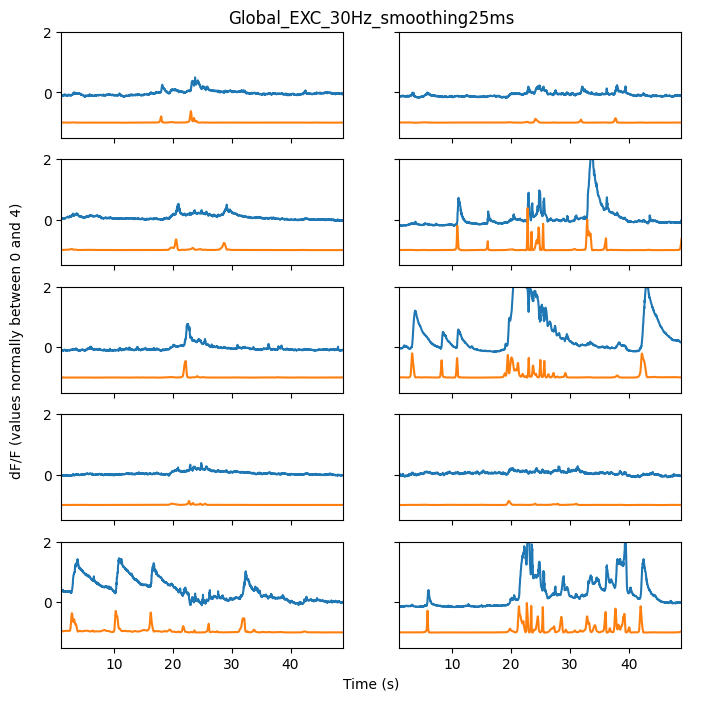

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing25ms_causalkernel"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 25 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 972us/step
	... ensemble 1
1623/1623 [==============================] - 1s 881us/step
	... ensemble 2
1623/1623 [==============================] - 2s 984us/step
	... ensemble 3
1623/1623 [==============================] - 1s 884us/step
	... ensemble 4
1623/1623 [==============================] - 2s 986us/step

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise

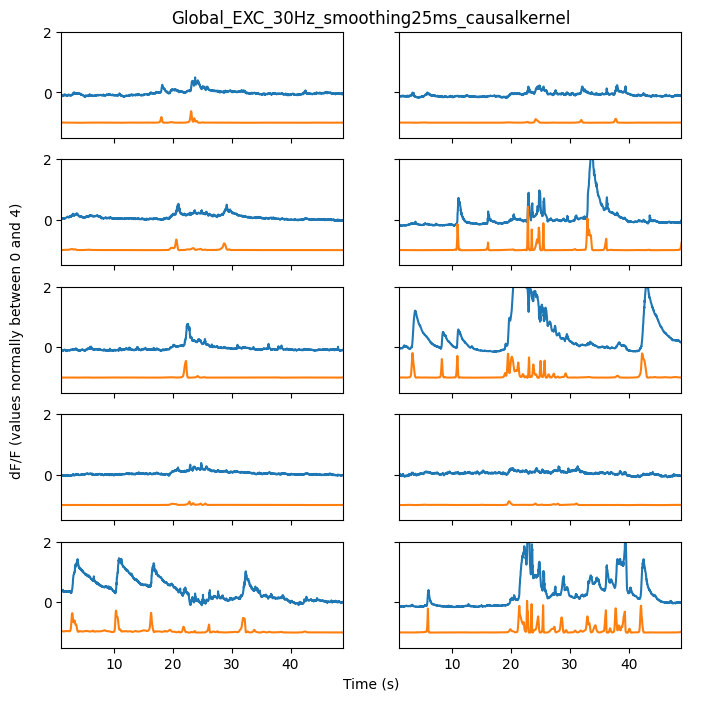

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing50ms"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 50 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
203/203 [==============================] - 1s 6ms/step
	... ensemble 1
203/203 [==============================] - 1s 3ms/step
	... ensemble 2
203/203 [==============================] - 1s 3ms/step
	... ensemble 3
203/203 [==============================] - 1s 4ms/step
	... ensemble 4
203/203 [==============================] - 1s 5ms/step

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise level 4:
	No neurons for this 

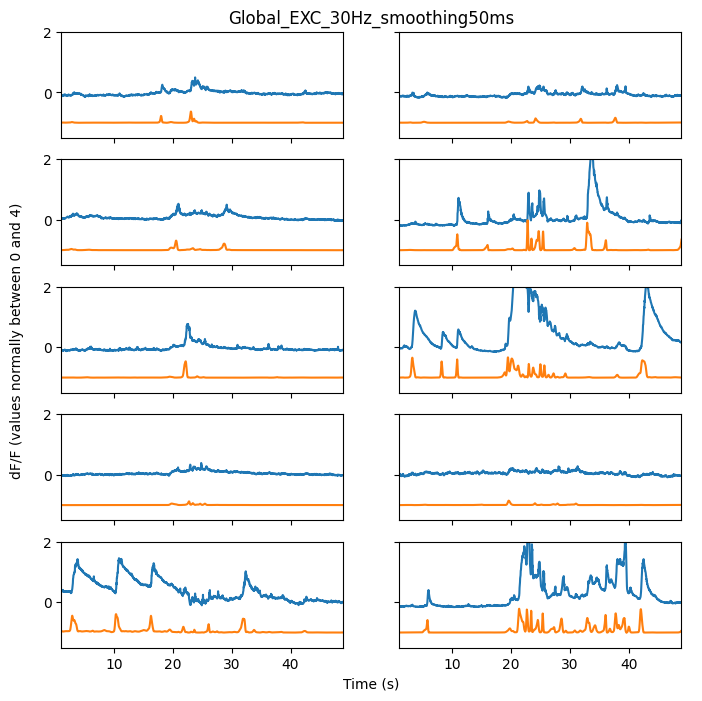

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing50ms_high_noise"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 50 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 1
1623/1623 [==============================] - 2s 922us/step
	... ensemble 2
1623/1623 [==============================] - 2s 991us/step
	... ensemble 3
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 4
1623/1623 [==============================] - 2s 1ms/step

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise level

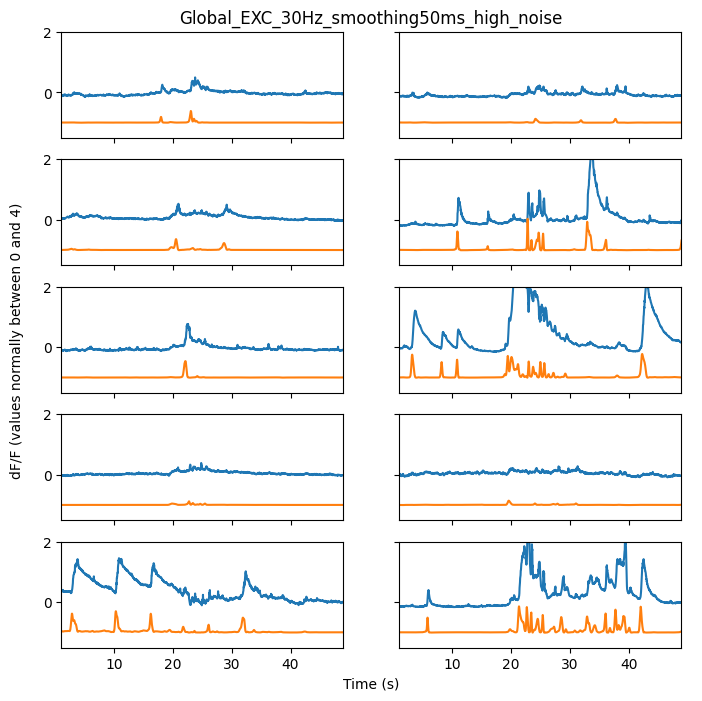

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing50ms_causalkernel"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 50 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
203/203 [==============================] - 1s 3ms/step
	... ensemble 1
203/203 [==============================] - 1s 3ms/step
	... ensemble 2
203/203 [==============================] - 1s 2ms/step
	... ensemble 3
203/203 [==============================] - 1s 3ms/step
	... ensemble 4
203/203 [==============================] - 1s 3ms/step

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise level 4:
	No neuron

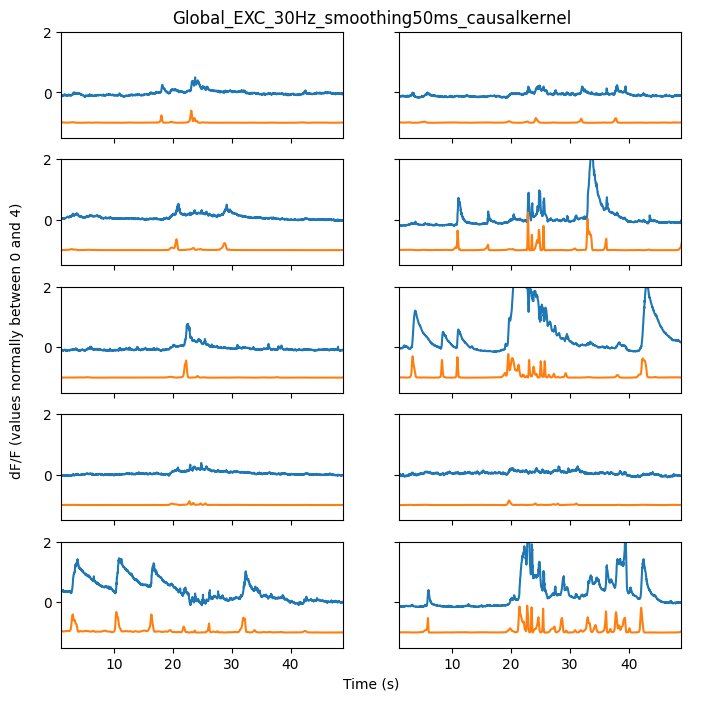

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing100ms"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 200 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 1:
	... ensemble 0
203/203 [==============================] - 1s 2ms/step
	... ensemble 1
203/203 [==============================] - 1s 3ms/step
	... ensemble 2
203/203 [==============================] - 1s 3ms/step
	... ensemble 3
203/203 [==============================] - 1s 2ms/step
	... ensemble 4
203/203 [==============================] - 1s 3ms/step

Predictions for noise level 2:
	No neurons for this noise level

Predictions for noise level 3:
	No neurons for thi

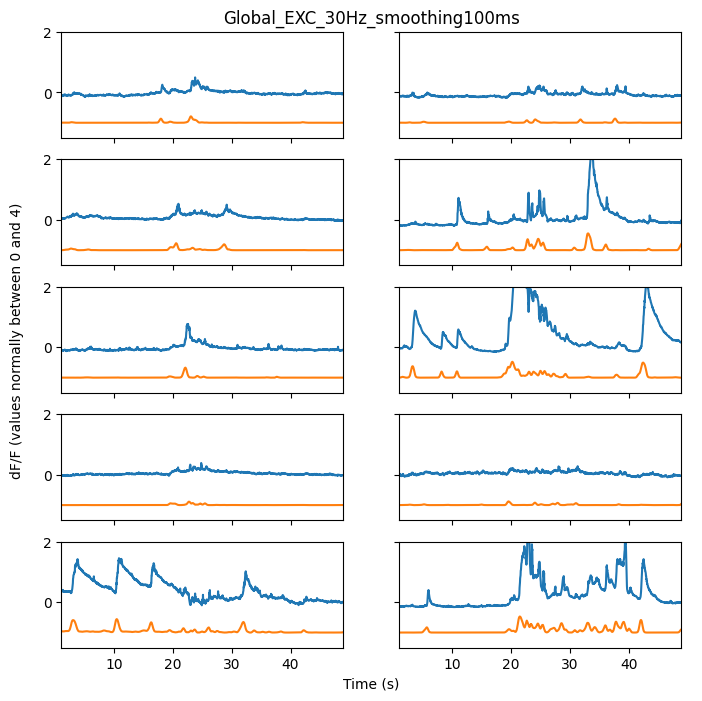

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing100ms_causalkernel"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 100 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 1
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 2
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 3
1623/1623 [==============================] - 2s 985us/step
	... ensemble 4
1623/1623 [==============================] - 2s 982us/step

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise lev

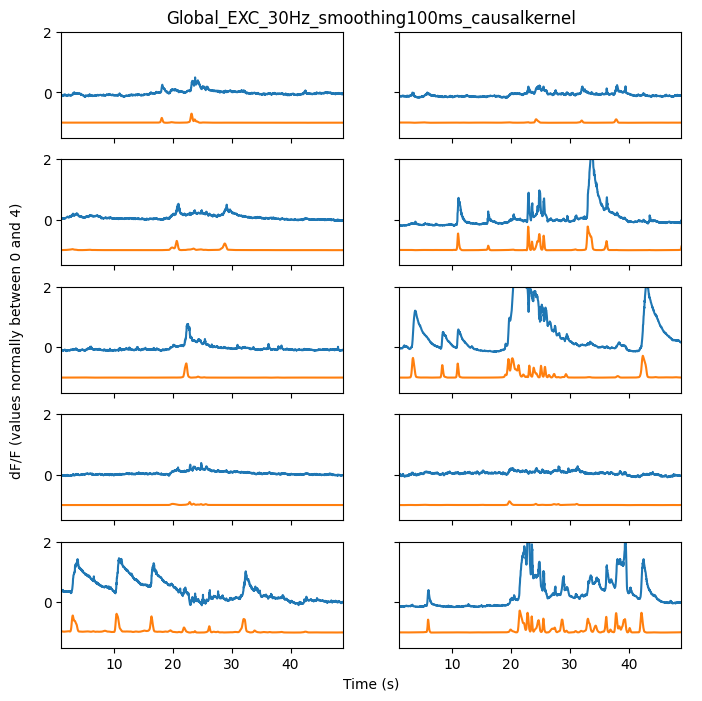

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing200ms"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 200 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
203/203 [==============================] - 1s 3ms/step
	... ensemble 1
203/203 [==============================] - 1s 3ms/step
	... ensemble 2
203/203 [==============================] - 1s 5ms/step
	... ensemble 3
203/203 [==============================] - 1s 3ms/step
	... ensemble 4
203/203 [==============================] - 1s 3ms/step

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise level 4:
	No neurons for thi

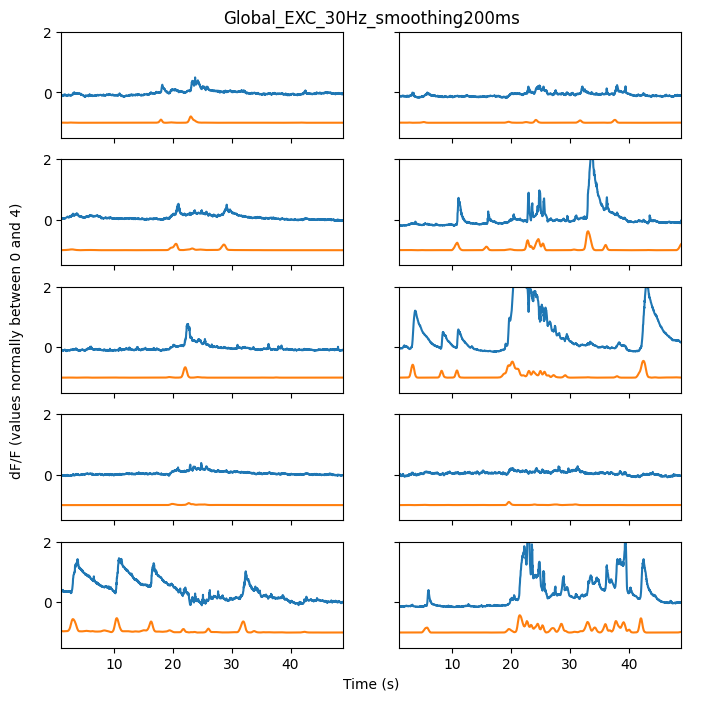

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing100ms_causalkernel_high_noise"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 100 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 1
1623/1623 [==============================] - 2s 948us/step
	... ensemble 2
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 3
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 4
1623/1623 [==============================] - 2s 1ms/step

Predictions for noise level 3:
	No neurons for this noise level

Predictions for 

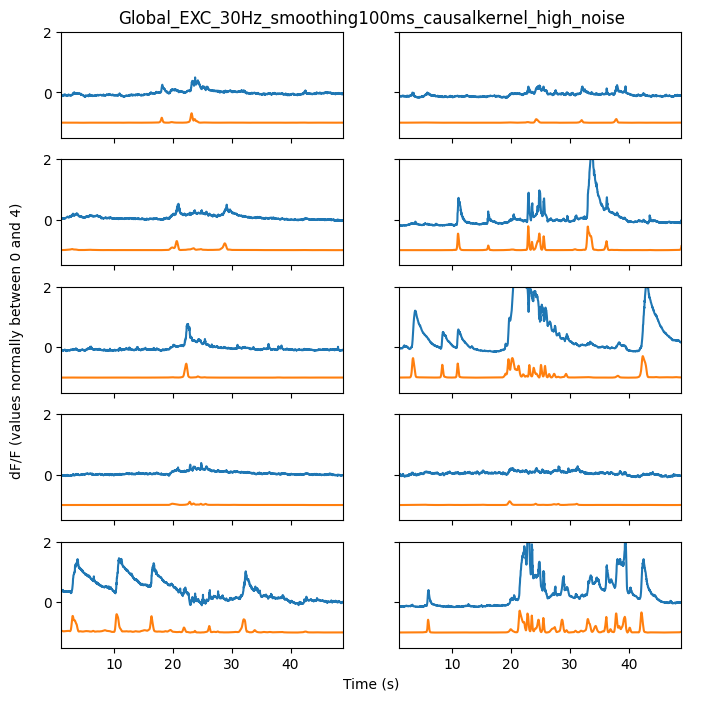

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing100ms_high_noise"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 100 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 1
1623/1623 [==============================] - 2s 977us/step
	... ensemble 2
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 3
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 4
1623/1623 [==============================] - 2s 1ms/step

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise level

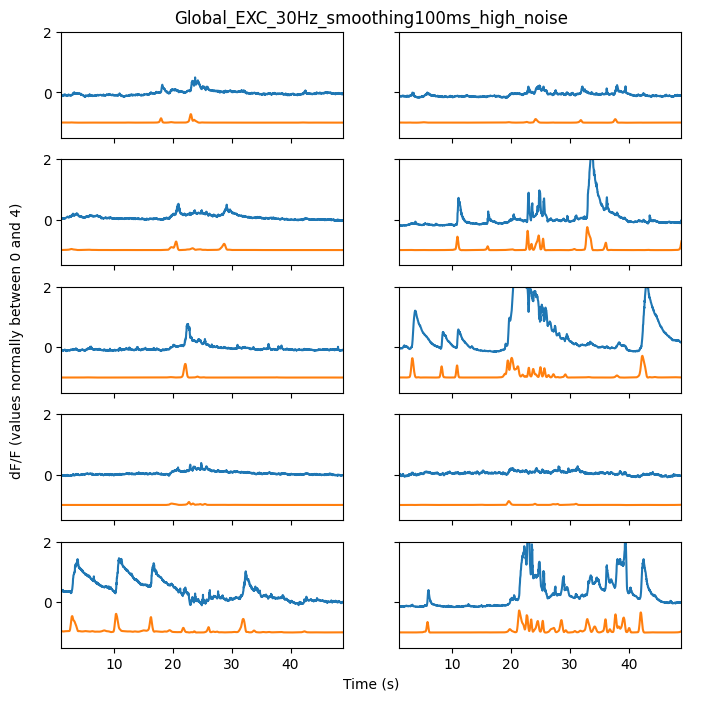

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing200ms_causalkernel_high_noise"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 200 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 1
1623/1623 [==============================] - 2s 969us/step
	... ensemble 2
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 3
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 4
1623/1623 [==============================] - 2s 1ms/step

Predictions for noise level 3:
	No neurons for this noise level

Predictions for 

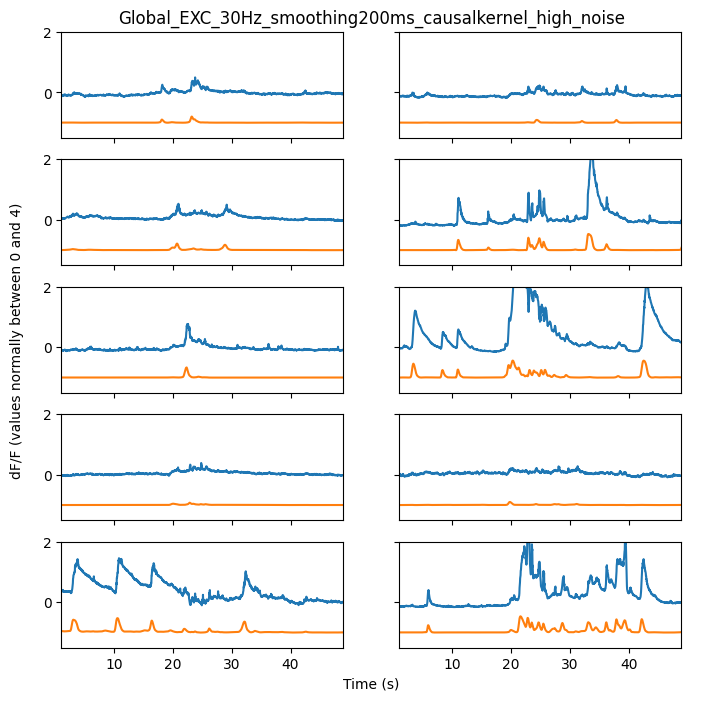

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing50ms_asymmetric_window_1_frame"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 50 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 1
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 2
1623/1623 [==============================] - 2s 964us/step
	... ensemble 3
1623/1623 [==============================] - 2s 966us/step
	... ensemble 4
1623/1623 [==============================] - 2s 916us/step

Predictions for noise level 3:
	No neurons for this noise level

Prediction

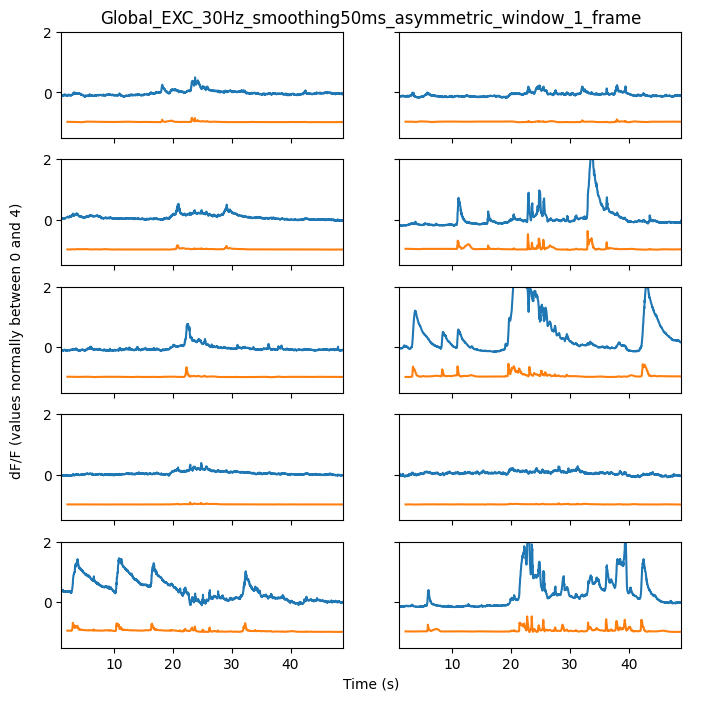

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing50ms_asymmetric_window_2_frames"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 50 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 937us/step
	... ensemble 1
1623/1623 [==============================] - 1s 815us/step
	... ensemble 2
1623/1623 [==============================] - 2s 973us/step
	... ensemble 3
1623/1623 [==============================] - 2s 958us/step
	... ensemble 4
1623/1623 [==============================] - 2s 967us/step

Predictions for noise level 3:
	No neurons for this noise level

Predi

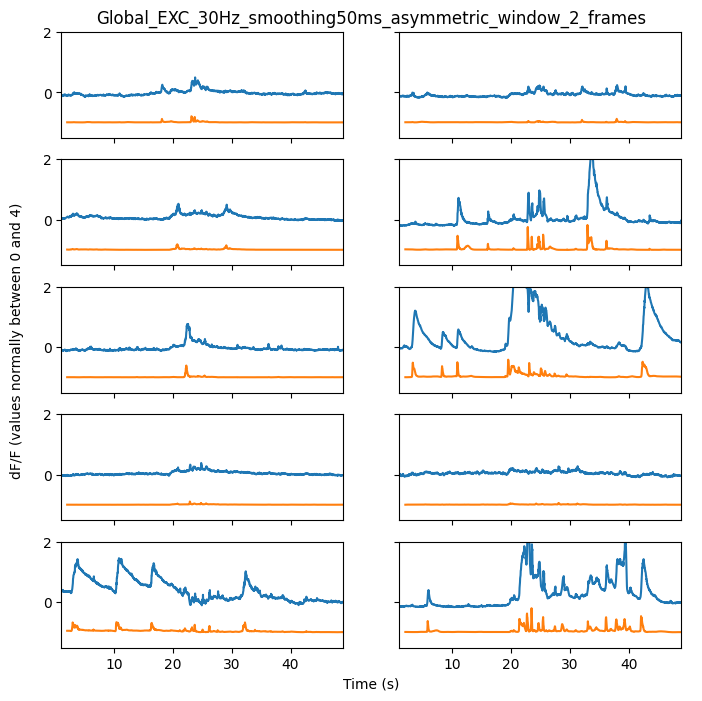

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing50ms_asymmetric_window_4_frames"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 50 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 859us/step
	... ensemble 1
1623/1623 [==============================] - 2s 905us/step
	... ensemble 2
1623/1623 [==============================] - 2s 942us/step
	... ensemble 3
1623/1623 [==============================] - 2s 948us/step
	... ensemble 4
1623/1623 [==============================] - 2s 955us/step

Predictions for noise level 3:
	No neurons for this noise level

Predi

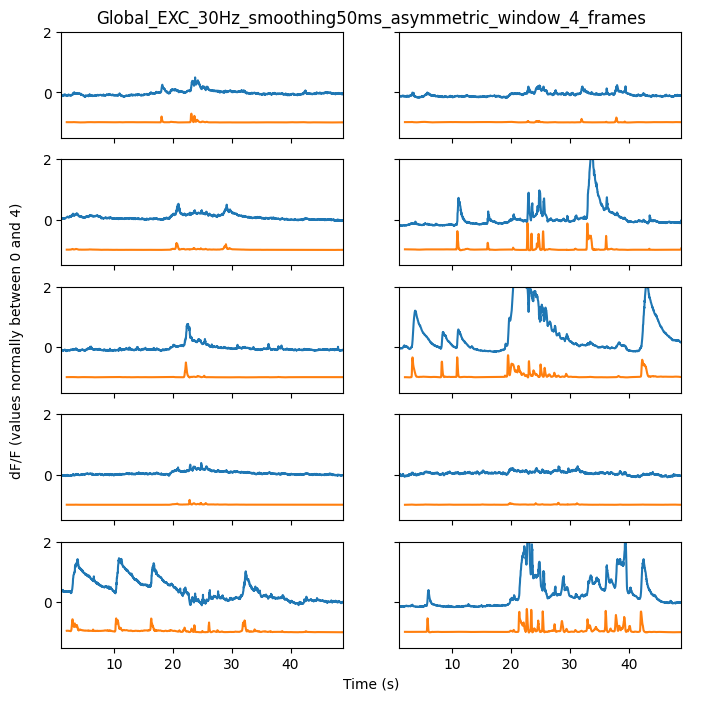

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing50ms_asymmetric_window_6_frames"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 50 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 1ms/step
	... ensemble 1
1623/1623 [==============================] - 2s 900us/step
	... ensemble 2
1623/1623 [==============================] - 2s 944us/step
	... ensemble 3
1623/1623 [==============================] - 2s 932us/step
	... ensemble 4
1623/1623 [==============================] - 2s 920us/step

Predictions for noise level 3:
	No neurons for this noise level

Predict

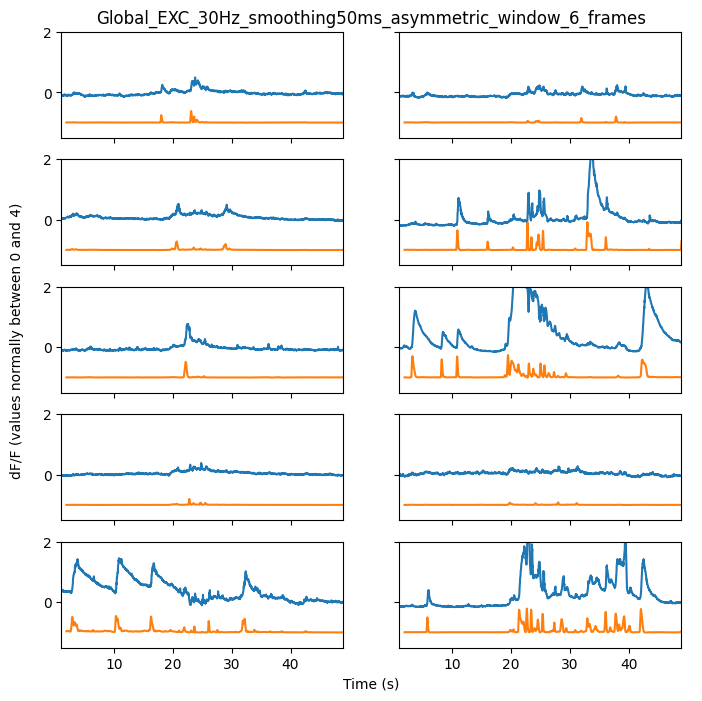

Pretrained model was saved in folder "d:\Cascade\Pretrained_models\Global_EXC_30Hz_smoothing50ms_asymmetric_window_8_frames"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 50 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 80 neurons and 20769 frames.
Noise levels (mean, std; in standard units): 0.21, 0.06

Predictions for noise level 2:
	... ensemble 0
1623/1623 [==============================] - 2s 932us/step
	... ensemble 1
1623/1623 [==============================] - 1s 871us/step
	... ensemble 2
1623/1623 [==============================] - 1s 869us/step
	... ensemble 3
1623/1623 [==============================] - 2s 924us/step
	... ensemble 4
1623/1623 [==============================] - 2s 932us/step

Predictions for noise level 3:
	No neurons for this noise level

Predi

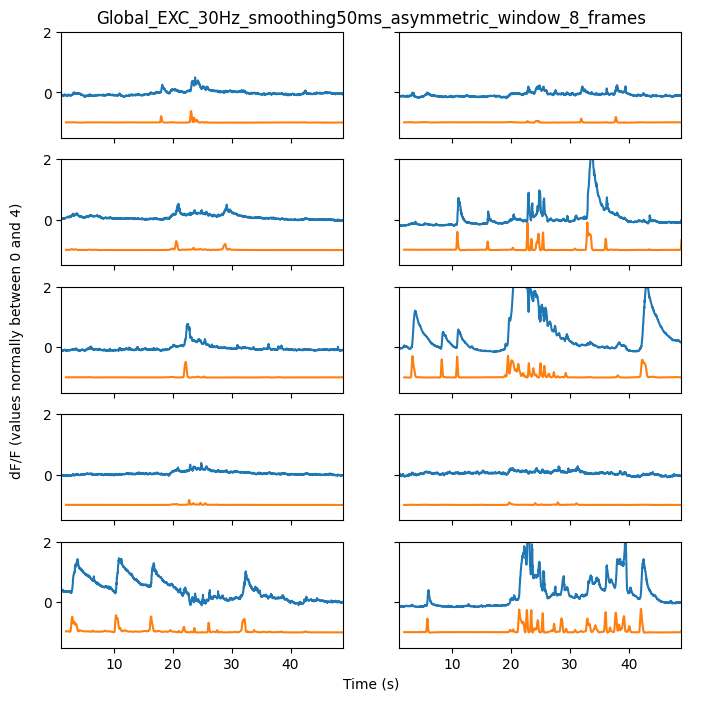

In [20]:
list_model_name = [
    "Global_EXC_30Hz_smoothing25ms",
    "Global_EXC_30Hz_smoothing25ms_causalkernel",
    "Global_EXC_30Hz_smoothing50ms",
    "Global_EXC_30Hz_smoothing50ms_high_noise",
    "Global_EXC_30Hz_smoothing50ms_causalkernel",
    "Global_EXC_30Hz_smoothing100ms",
    "Global_EXC_30Hz_smoothing100ms_causalkernel",
    "Global_EXC_30Hz_smoothing200ms",
    "Global_EXC_30Hz_smoothing100ms_causalkernel_high_noise",
    "Global_EXC_30Hz_smoothing100ms_high_noise",
    "Global_EXC_30Hz_smoothing200ms_causalkernel_high_noise",
    "Global_EXC_30Hz_smoothing50ms_asymmetric_window_1_frame",
    "Global_EXC_30Hz_smoothing50ms_asymmetric_window_2_frames",
    "Global_EXC_30Hz_smoothing50ms_asymmetric_window_4_frames",
    "Global_EXC_30Hz_smoothing50ms_asymmetric_window_6_frames",
    "Global_EXC_30Hz_smoothing50ms_asymmetric_window_8_frames",
]

for model_name in list_model_name:
    cascade.download_model( model_name,verbose = 1)
    spike_prob = cascade.predict( model_name, traces )

    frame_rate = 30

    plt.rcParams['figure.figsize'] = (8.0, 8.0)
    np.random.seed(1)
    neuron_indices = np.random.randint(traces.shape[0], size=10)
    plot_dFF_traces(traces,neuron_indices,frame_rate,spike_prob,title=model_name)
    plt.savefig(f'figure/practice/{name_Fall}_{model_name}.png', dpi=300)
    plt.show()

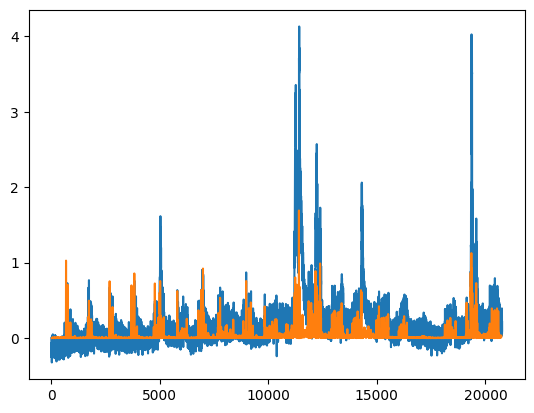

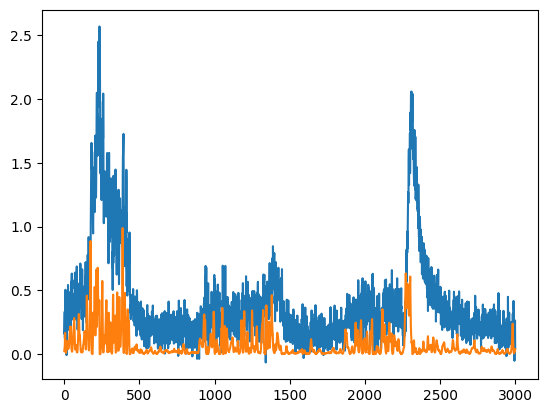

In [5]:
idx = 2
multiplier = 1

plt.figure()
plt.plot(traces[idx])
plt.plot(spike_prob[idx] * multiplier)
plt.show()

range = (12000, 15000)
plt.figure()
plt.plot(traces[idx, range[0]:range[1]])
plt.plot(spike_prob[idx, range[0]:range[1]] * multiplier)
plt.show()

In [54]:
neuron_indices

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1])

In [10]:
name_Fall

'Fall_KA45-f1-z130_240303_1-preWsk4bit'